In [1]:
import torch
import tqdm
import cv2

# Preparing directory for FAWDN git repo

In [3]:
!pip install options
!git clone https://github.com/mhalbert/COVID19_SR_BinaryClassification.git

  Using cached options-1.4.10-py3-none-any.whl (15 kB)
  Using cached nulltype-2.3.1-py2.py3-none-any.whl (11 kB)
  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached combomethod-1.0.12-py2.py3-none-any.whl (6.8 kB)
  Using cached chainmap-1.0.3-py3-none-any.whl (9.2 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/opt/conda/lib/python3.7/site-packages/__pycache__/six.cpython-37.pyc'

Cloning into 'COVID19_SR_BinaryClassification'...
remote: Enumerating objects: 12270, done.
remote: Counting objects: 100% (1048/1048), done.
remote: Compressing objects: 100% (428/428), done.
remote: Total 12270 (delta 633), reused 1024 (delta 613), pack-reused 11222
Receiving objects: 100% (12270/12270), 410.70 MiB | 33.17 MiB/s, done.
Resolving deltas: 100% (635/635), done.
Updating files: 100% (172/172), done.


In [21]:
!git pull 

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), 288 bytes | 288.00 KiB/s, done.
From https://github.com/mhalbert/COVID19_SR_BinaryClassification
   53a9779..c805e61  main       -> origin/main
Updating 53a9779..c805e61
Fast-forward
 main.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


## Main.py

In [ ]:
%cd /kaggle/working/COVID19_SR_BinaryClassification

In [22]:
!python /kaggle/working/COVID19_SR_BinaryClassification/main.py 

===> [LR] Dataset is created.
===> Test Dataset: [MyImage]   Number of images: [100]
===> Building network [FAWDN]...
===> Loading model from [./models/best_FAWDN+_x2.pth]...
===> Solver Initialized : [SRSolver] || Use CL : [True] || Use GPU : [True]
===> Start Test
Method: FAWDN || Scale: 2 || Degradation: BI
Test set : [MyImage]
[1/100] COVIDCTMD-P003-IM0059_2.png || Timer: 4.4712 sec .
[2/100] COVIDCTMD-P012-IM0061_2.png || Timer: 0.1411 sec .
[3/100] COVIDCTMD-P026-IM0041_2.png || Timer: 0.1468 sec .
[4/100] COVIDCTMD-P030-IM0029_2.png || Timer: 0.1414 sec .
[5/100] COVIDCTMD-P030-IM0064_2.png || Timer: 0.1415 sec .
[6/100] COVIDCTMD-P033-IM0101_2.png || Timer: 0.1367 sec .
[7/100] COVIDCTMD-P038-IM0101_2.png || Timer: 0.1387 sec .
[8/100] COVIDCTMD-P044-IM0070_2.png || Timer: 0.1442 sec .
[9/100] COVIDCTMD-cap013-IM0052_1.png || Timer: 0.1424 sec .
[10/100] COVIDCTMD-normal001-IM0053_0.png || Timer: 0.1399 sec .
[11/100] COVIDCTMD-normal009-IM0063_0.png || Timer: 0.1394 sec .
[12/

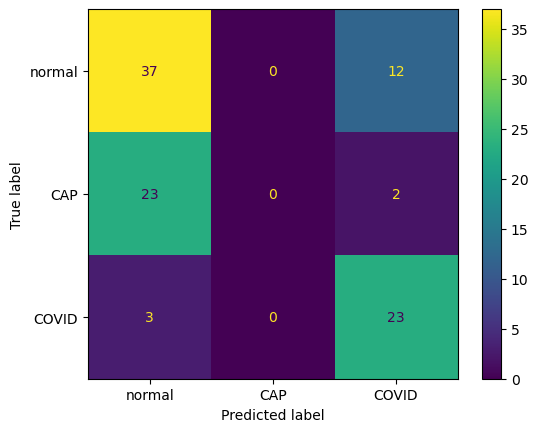

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

cm = genfromtxt('/kaggle/working/cm.txt', delimiter=',')

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['normal', 'CAP', 'COVID'])

disp.plot()

plt.show()

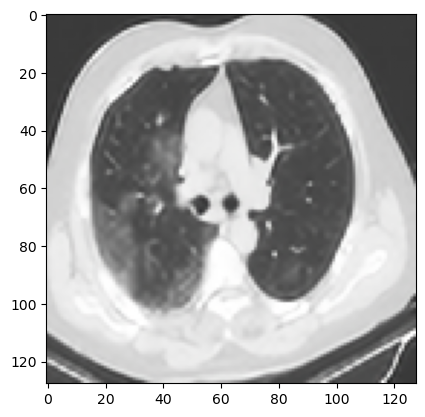

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/kaggle/working/MyImage/FAWDN/x2/COVIDCTMD-P003-IM0059_2.png')
imgplot = plt.imshow(img)
plt.show()